## WIDS Competition 2022

The following is pulled from https://www.kaggle.com/competitions/widsdatathon2022/overview

#### Background information 
Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use.

According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.

#### Data Dictionary
###### Features

- id: building id
- Year_Factor: anonymized year in which the weather and energy usage factors were observed
- State_Factor: anonymized state in which the building is located
- building_class: building classification
- facility_type: building usage type
- floor_area: floor area (in square feet) of the building
- year_built: year in which the building was constructed
- energy_star_rating: the energy star rating of the building
- ELEVATION: elevation of the building location
- january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building
- january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building
- january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building
- cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.
- heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.
- precipitation_inches: annual precipitation in inches at the location of the building
- snowfall_inches: annual snowfall in inches at the location of the building
- snowdepth_inches: annual snow depth in inches at the location of the building
- avg_temp: average temperature over a year at the location of the building
- days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building
- days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building
- days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building
- days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building
- days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building
- days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building
- days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building
- days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building
- direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).
- direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).
- max_wind_speed: maximum wind speed at the location of the building
- days_with_fog: number of days with fog at the location of the building

##### Target
- site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills


### Load libraries

In [1]:
import time
import os
import sys
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

# for feature engineering
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


# for splitting data
from sklearn.model_selection import train_test_split

# for our various model trainings
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# scoring
from sklearn.metrics import accuracy_score

### Read in our training data and test data

In [2]:
input_df = pd.read_csv("/Users/rexxx/widsdatathon2022/a_data_intake/_input_data/train.csv")

In [3]:
input_df.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

### Initial Data Characteristic Exploratory Analysis

In [4]:
# get data types, number of rows per variable and whether there are NAs or not
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
# get proportion of NAs and pull only variables with NAs
prop_nas = input_df.apply(lambda col: col.isna().sum()*100/len(input_df))
prop_nas[prop_nas > 0]

year_built                    2.424858
energy_star_rating           35.256148
direction_max_wind_speed     54.228652
direction_peak_wind_speed    55.190939
max_wind_speed               54.228652
days_with_fog                60.451179
dtype: float64

There are some NAs/missingness in our dataset. We want to set off a cutoff for missingness in our dataset. Here we'll use the threshold of > 40% missingness is unsable because we don't want to impute or remove that many rows of data. 

So the following will be likely dropped: 
- direction_max_wind_speed
- direction_peak_wind_speed
- max_wind_speed
- days_with_fog

We will see if **energy_star_rating** will need to be dropped or go through an imputation method depending on its explanability against our **site_eui** variable.

We can see here that majority of our variables are numeric (as expected with the variable definition) and won't need any data type conversion prior to analysis. 

In [6]:
# look for duplicate datapoints
input_df[input_df.duplicated()]

Empty DataFrame
Columns: [Year_Factor, State_Factor, building_class, facility_type, floor_area, year_built, energy_star_rating, ELEVATION, january_min_temp, january_avg_temp, january_max_temp, february_min_temp, february_avg_temp, february_max_temp, march_min_temp, march_avg_temp, march_max_temp, april_min_temp, april_avg_temp, april_max_temp, may_min_temp, may_avg_temp, may_max_temp, june_min_temp, june_avg_temp, june_max_temp, july_min_temp, july_avg_temp, july_max_temp, august_min_temp, august_avg_temp, august_max_temp, september_min_temp, september_avg_temp, september_max_temp, october_min_temp, october_avg_temp, october_max_temp, november_min_temp, november_avg_temp, november_max_temp, december_min_temp, december_avg_temp, december_max_temp, cooling_degree_days, heating_degree_days, precipitation_inches, snowfall_inches, snowdepth_inches, avg_temp, days_below_30F, days_below_20F, days_below_10F, days_below_0F, days_above_80F, days_above_90F, days_above_100F, days_above_110F, direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog, site_eui, id]
Index: []

[0 rows x 64 columns]

In [7]:
# see unique values in each variable
input_df.apply(lambda col: col.unique())[0:32]

Year_Factor                                          [1, 2, 3, 4, 5, 6]
State_Factor          [State_1, State_2, State_4, State_6, State_8, ...
building_class                                [Commercial, Residential]
facility_type         [Grocery_store_or_food_market, Warehouse_Distr...
floor_area            [61242.0, 274000.0, 280025.0, 55325.0, 66000.0...
year_built            [1942.0, 1955.0, 1951.0, 1980.0, 1985.0, 1956....
energy_star_rating    [11.0, 45.0, 97.0, 46.0, 100.0, nan, 56.0, 99....
ELEVATION             [2.4, 1.8, 59.1, 120.1, 18.6, 45.7, 29.6, 131....
january_min_temp      [36, 45, 43, 41, 34, 24, 31, 40, 22, 29, 19, 2...
january_avg_temp      [50.5, 64.27419355, 58.19354839, 57.61290323, ...
january_max_temp      [68, 89, 83, 81, 80, 76, 90, 88, 82, 77, 73, 6...
february_min_temp     [35, 39, 46, 40, 37, 29, 32, 36, 33, 20, 19, 2...
february_avg_temp     [50.58928571, 59.31034483, 57.87931034, 56.125...
february_max_temp     [73, 82, 75, 80, 86, 85, 78, 81, 74, 77, 6

In [8]:
input_df.apply(lambda col: col.unique())[32:input_df.shape[0]]

september_min_temp           [52, 59, 65, 63, 51, 60, 50, 62, 58, 47, 43, 4...
september_avg_temp           [64.65, 73.75, 74.75, 72.79310345, 89.55, 78.2...
september_max_temp           [90, 98, 101, 94, 109, 100, 108, 107, 104, 102...
october_min_temp             [47, 53, 54, 52, 49, 41, 43, 31, 46, 40, 39, 4...
october_avg_temp             [63.01612903, 69.77419355, 69.09677419, 68.177...
october_max_temp             [83, 93, 92, 94, 108, 96, 105, 98, 101, 100, 8...
november_min_temp            [43, 47, 45, 38, 28, 42, 32, 35, 27, 33, 19, 3...
november_avg_temp            [53.8, 63.01666667, 62.23333333, 61.4, 66.0333...
november_max_temp            [72, 90, 87, 91, 94, 84, 96, 95, 93, 83, 86, 8...
december_min_temp            [36, 43, 41, 39, 32, 22, 37, 28, 23, 29, 10, 1...
december_avg_temp            [49.27419355, 56.67741935, 57.37096774, 56.112...
december_max_temp            [71, 70, 82, 76, 79, 77, 73, 66, 69, 75, 59, 6...
cooling_degree_days          [115, 940, 899, 744, 44

### Initial data exploration - looking into pitfall areas (e.g: correlation, distribution of values, etc)

In [9]:
# when looking at correlation/patterns between numeric variables, remove these id/non-numeric vars:
too_many_nas_vars = ['id',
    'direction_max_wind_speed',
    'direction_peak_wind_speed',
    'max_wind_speed',
    'days_with_fog'
]

In [10]:
# correlation matrix
corr_df = input_df.drop(columns = too_many_nas_vars).corr()
corr_df[(abs(corr_df) > 0.10) & (abs(corr_df) < 1.0)]

Year_Factor  floor_area  year_built  energy_star_rating  \
Year_Factor                   NaN         NaN         NaN                 NaN   
floor_area                    NaN         NaN    0.100878                 NaN   
year_built                    NaN    0.100878         NaN                 NaN   
energy_star_rating            NaN         NaN         NaN                 NaN   
ELEVATION                0.132855         NaN         NaN                 NaN   
january_min_temp              NaN   -0.148467         NaN            0.144452   
january_avg_temp              NaN   -0.137654         NaN            0.149421   
january_max_temp        -0.291137   -0.104118         NaN                 NaN   
february_min_temp       -0.391312   -0.106110         NaN            0.126411   
february_avg_temp       -0.101799   -0.120068         NaN            0.137479   
february_max_temp             NaN         NaN         NaN            0.104399   
march_min_temp                NaN   -0.121068         NaN            0.134648   
march_avg_temp                NaN         NaN         NaN            0.137160   
march_max_temp           0.167406         NaN         NaN                 NaN   
april_min_temp          -0.463176         NaN         NaN            0.105996   
april_avg_temp          -0.164931   -0.100034         NaN            0.100951   
april_max_temp          -0.212332         NaN         NaN            0.101430   
may_min_temp            -0.274205         NaN         NaN                 NaN   
may_avg_temp            -0.196895         NaN         NaN                 NaN   
may_max_temp             0.114799         NaN         NaN                 NaN   
june_min_temp           -0.309140         NaN         NaN                 NaN   
june_avg_temp                 NaN         NaN         NaN           -0.106010   
june_max_temp           -0.406461         NaN         NaN                 NaN   
july_min_temp           -0.103637         NaN         NaN                 NaN   
july_avg_temp           -0.190931         NaN         NaN           -0.107087   
july_max_temp           -0.408861         NaN         NaN                 NaN   
august_min_temp               NaN         NaN   -0.103230                 NaN   
august_avg_temp          0.171693         NaN         NaN                 NaN   
august_max_temp          0.338786         NaN         NaN                 NaN   
september_min_temp            NaN         NaN   -0.122823                 NaN   
september_avg_temp       0.180126         NaN         NaN                 NaN   
september_max_temp            NaN         NaN   -0.102312                 NaN   
october_min_temp              NaN   -0.102459         NaN                 NaN   
october_avg_temp        -0.144199         NaN   -0.126027                 NaN   
october_max_temp              NaN         NaN   -0.104420                 NaN   
november_min_temp        0.148017   -0.112179         NaN                 NaN   
november_avg_temp        0.360374         NaN         NaN                 NaN   
november_max_temp        0.355420         NaN         NaN                 NaN   
december_min_temp       -0.260890         NaN         NaN                 NaN   
december_avg_temp       -0.119175         NaN         NaN                 NaN   
december_max_temp       -0.323793         NaN         NaN                 NaN   
cooling_degree_days           NaN         NaN         NaN                 NaN   
heating_degree_days           NaN    0.130198         NaN           -0.133304   
precipitation_inches    -0.124418         NaN         NaN           -0.109899   
snowfall_inches          0.182135         NaN         NaN           -0.140722   
snowdepth_inches              NaN         NaN         NaN           -0.111075   
avg_temp                      NaN   -0.111303   -0.112555                 NaN   
days_below_30F           0.137436    0.136123         NaN           -0.132442   
days_below_20F           0.260270    0.135476        

In [11]:
corr_df['site_eui'][abs(corr_df['site_eui']) > 0.10]

energy_star_rating     -0.511012
january_min_temp       -0.179190
january_avg_temp       -0.167982
february_min_temp      -0.147348
february_avg_temp      -0.154071
february_max_temp      -0.106693
march_min_temp         -0.134110
march_avg_temp         -0.135303
april_min_temp         -0.111528
april_avg_temp         -0.113008
june_avg_temp           0.122019
july_min_temp           0.108092
july_avg_temp           0.133856
august_avg_temp         0.113786
september_avg_temp      0.108853
november_min_temp      -0.100349
cooling_degree_days     0.125004
heating_degree_days     0.147861
precipitation_inches    0.113558
snowfall_inches         0.157284
snowdepth_inches        0.113371
days_below_30F          0.139811
days_below_20F          0.119492
site_eui                1.000000
Name: site_eui, dtype: float64

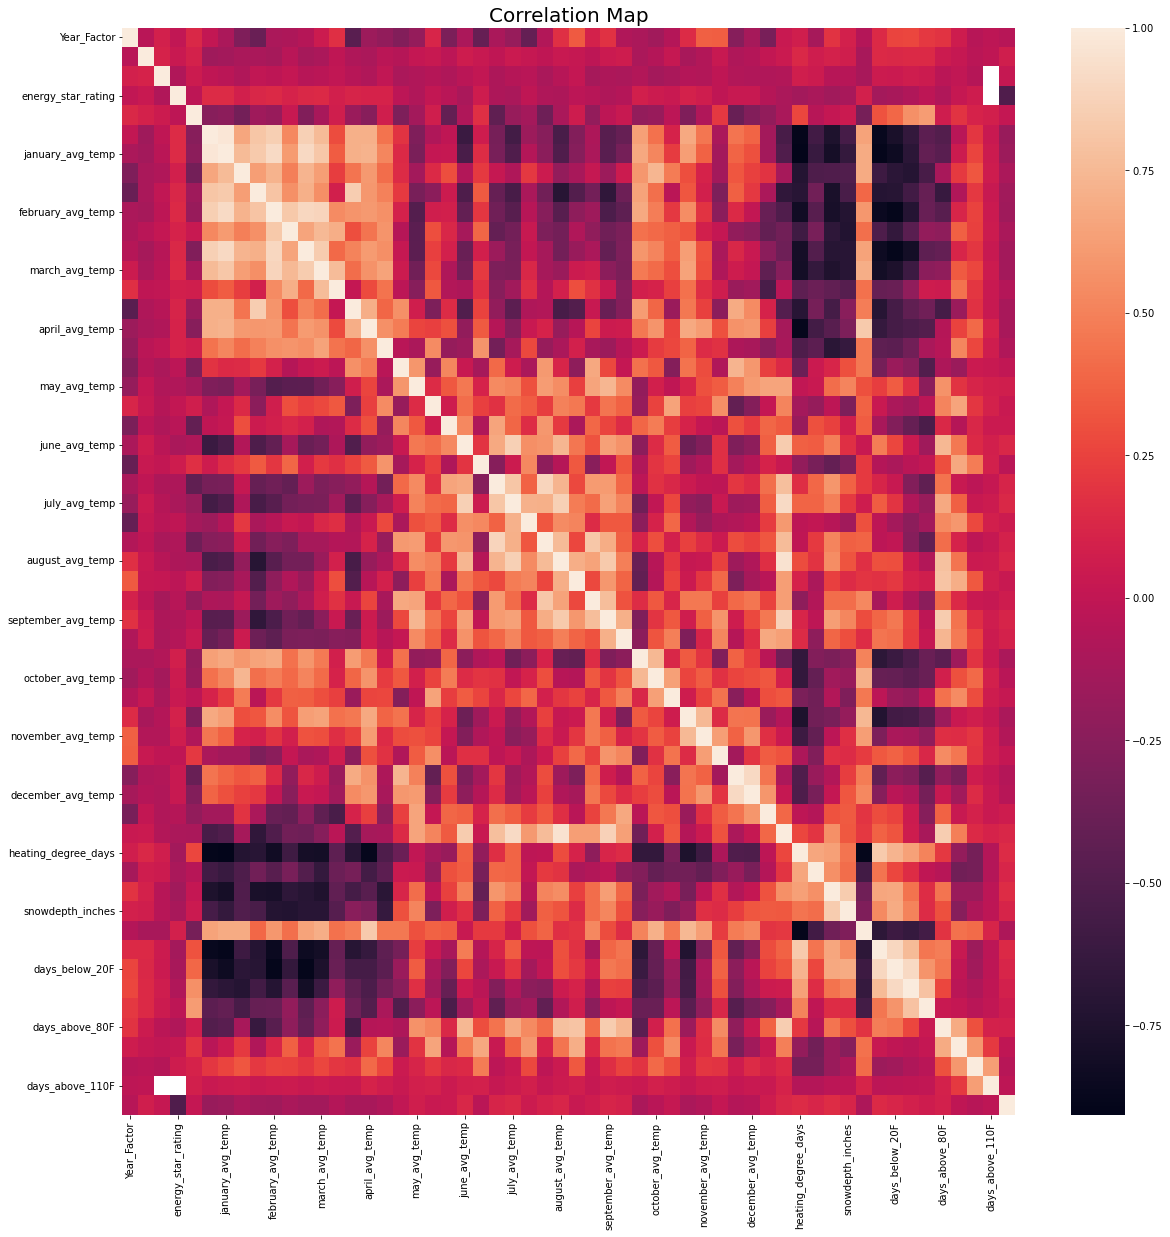

In [12]:
# correlation heatmap
corr_df = input_df.drop(columns =too_many_nas_vars).corr()
corr_map = sns.heatmap(corr_df, annot=False)
plt.title("Correlation Map", fontsize=20)
corr_map.figure.set_size_inches(20,20)
plt.show()

There is a strong correlation/collinearity of the temperature variables with each other. Ideally we would only keep one, either the *_avg_temp or *_max_temp or *_min_temp variables

We should also try to bin the days_below or days_above variables. 

In [13]:
drop_temp_vars = [
    col for col in input_df.columns 
    if col.endswith("_max_temp") 
    or col.endswith("_min_temp") 
    or col.endswith("_avg_temp")
    or col.startswith("days_below")
    or col.startswith('days_above')]

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_df(input_df : pd.DataFrame, vars_to_excl : list):
    ''' Gets the variance inflation factor for each variable in the dataset
    '''
    vif_df = input_df.drop(columns = vars_to_excl)
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    vif['variable'] = vif_df.columns
    return(vif.sort_values(by='VIF'))

In [15]:
get_vif_df(input_df = input_df.select_dtypes(include='number'), 
           vars_to_excl = too_many_nas_vars + list(prop_nas[prop_nas > 0].index) + drop_temp_vars)

VIF              variable
1   1.496249            floor_area
2   1.798886             ELEVATION
9   3.131839              site_eui
7   8.522247      snowdepth_inches
0  12.191876           Year_Factor
3  22.211039   cooling_degree_days
6  32.968092       snowfall_inches
5  39.332088  precipitation_inches
8  56.655957              avg_temp
4  65.582768   heating_degree_days

array([[<AxesSubplot:title={'center':'Year_Factor'}>,
        <AxesSubplot:title={'center':'floor_area'}>,
        <AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'energy_star_rating'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>,
        <AxesSubplot:title={'center':'january_min_temp'}>,
        <AxesSubplot:title={'center':'january_avg_temp'}>],
       [<AxesSubplot:title={'center':'january_max_temp'}>,
        <AxesSubplot:title={'center':'february_min_temp'}>,
        <AxesSubplot:title={'center':'february_avg_temp'}>,
        <AxesSubplot:title={'center':'february_max_temp'}>,
        <AxesSubplot:title={'center':'march_min_temp'}>,
        <AxesSubplot:title={'center':'march_avg_temp'}>,
        <AxesSubplot:title={'center':'march_max_temp'}>],
       [<AxesSubplot:title={'center':'april_min_temp'}>,
        <AxesSubplot:title={'center':'april_avg_temp'}>,
        <AxesSubplot:title={'center':'april_max_temp'}>,
        <AxesSubplot:title

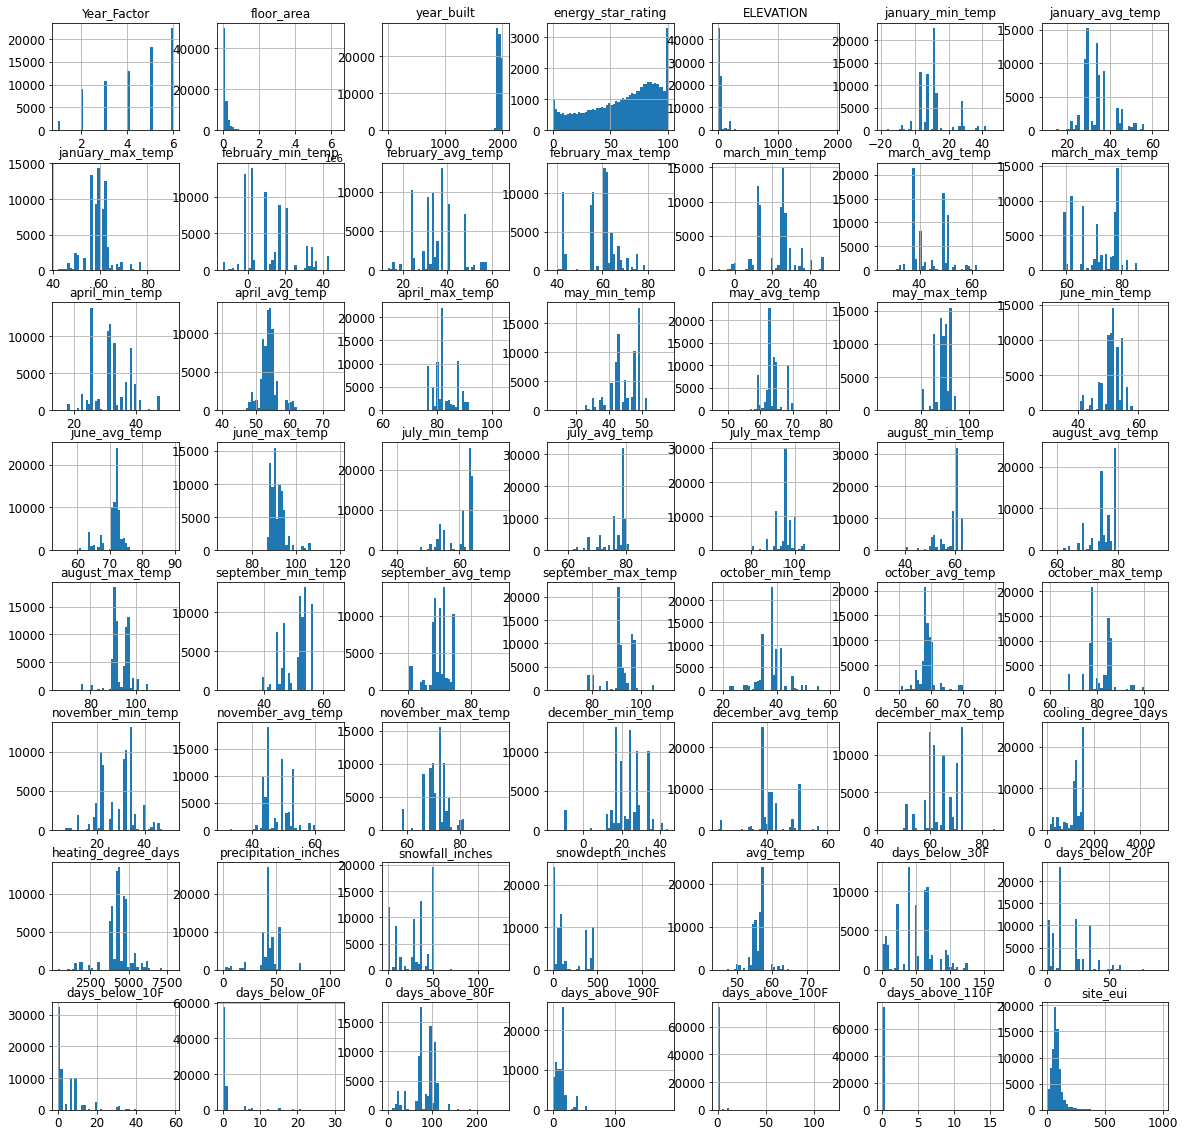

In [16]:
input_df.drop(columns = too_many_nas_vars).hist(figsize=(20, 20), bins=50, xlabelsize=12, ylabelsize=12)

In [17]:
# keep track of variables with strong distribution
vars_

NameError: name 'vars_' is not defined

### Linear Relationship check

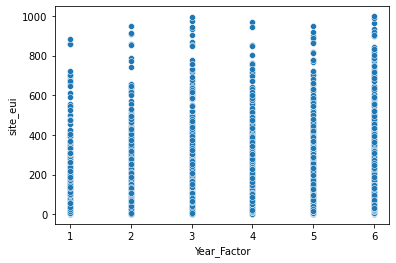

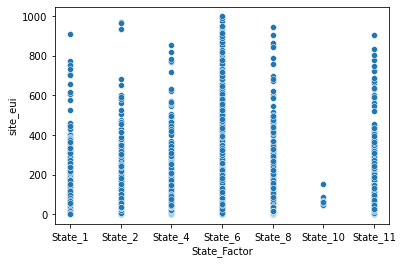

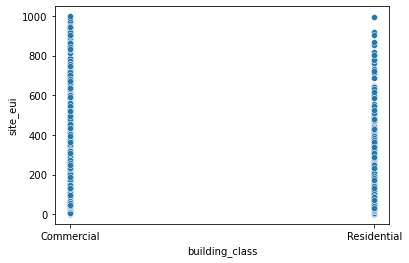

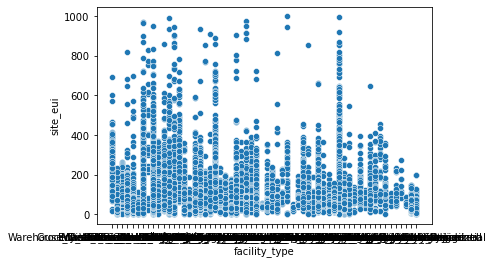

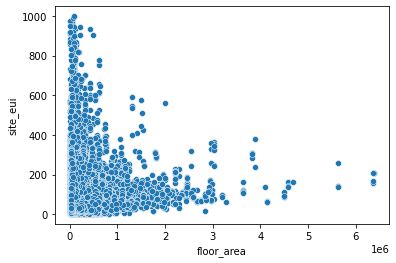

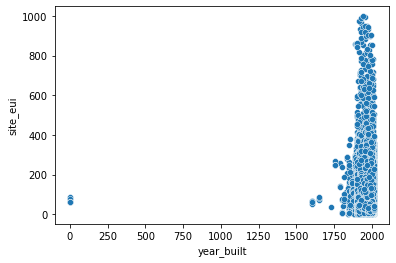

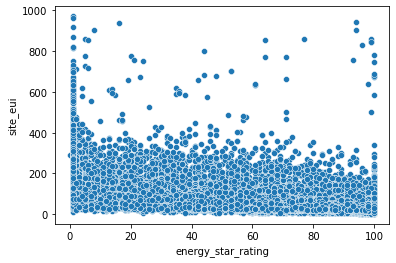

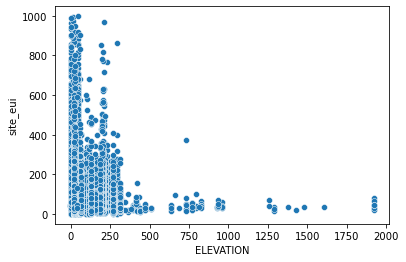

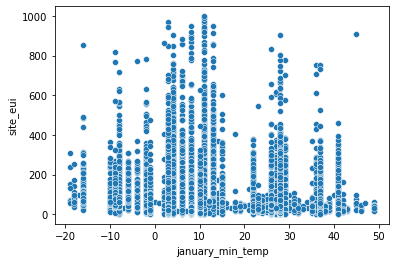

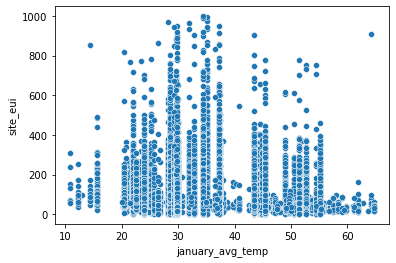

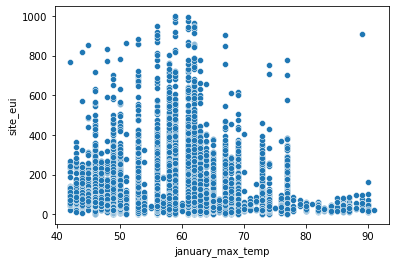

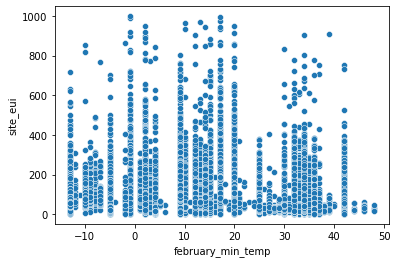

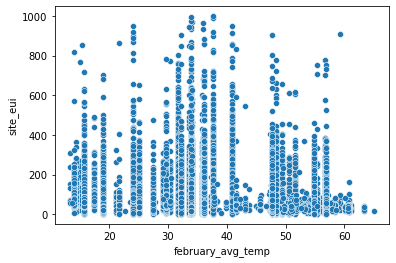

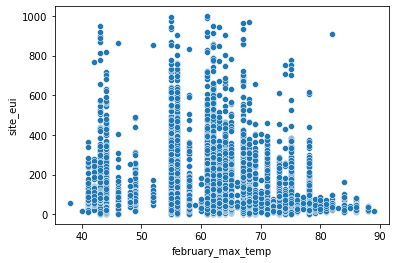

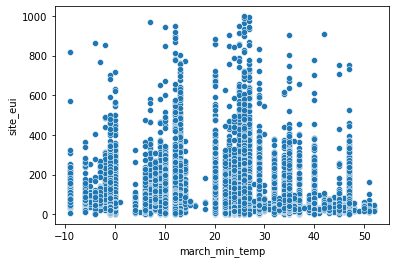

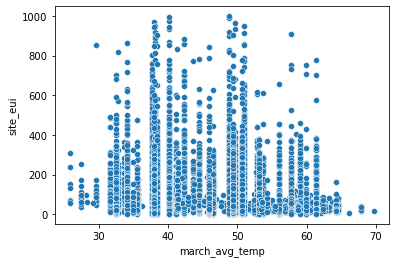

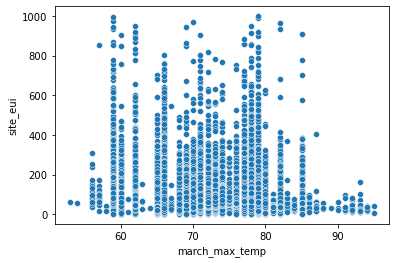

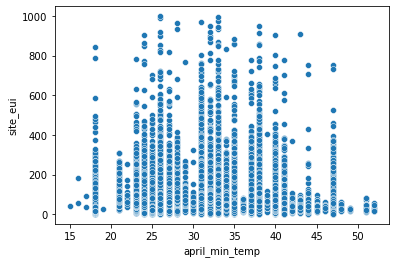

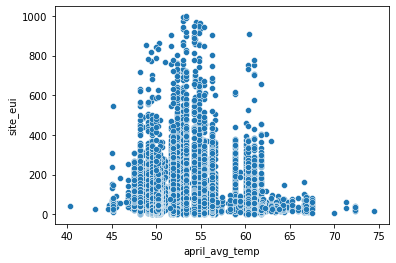

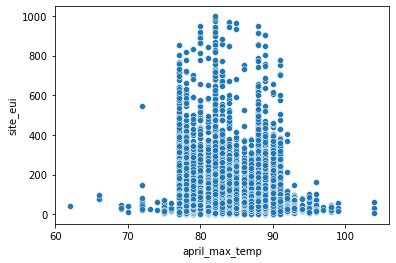

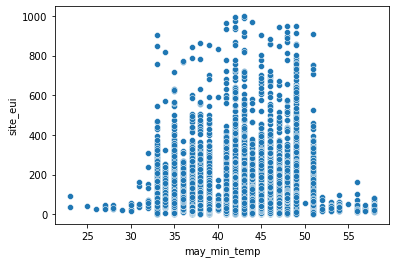

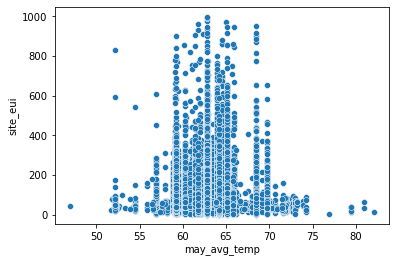

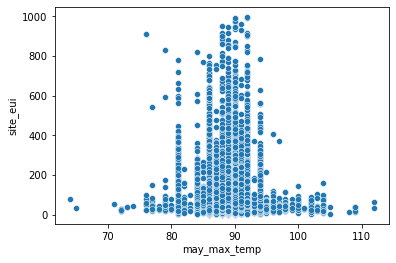

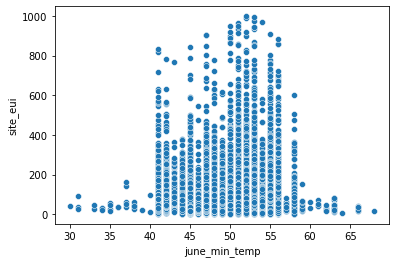

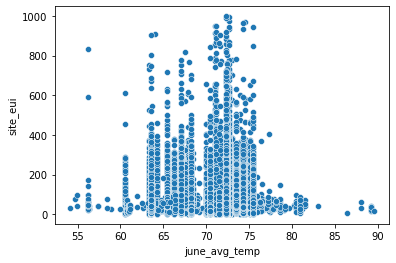

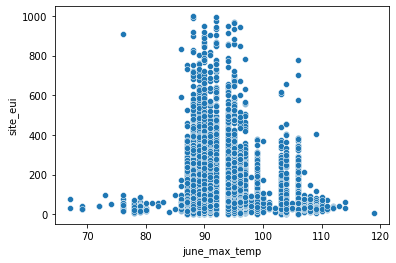

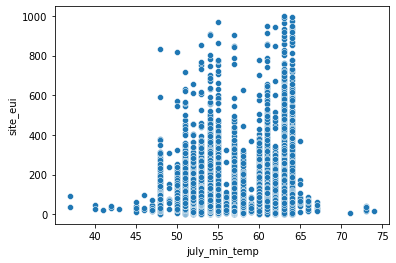

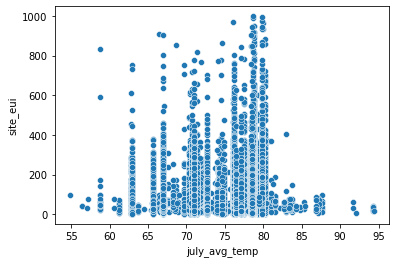

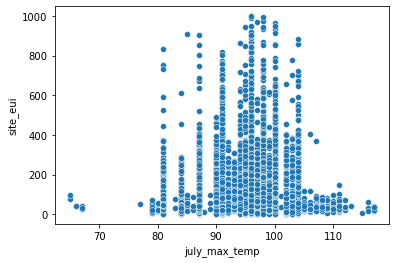

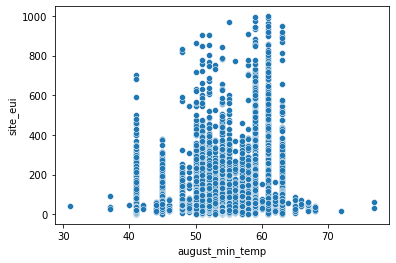

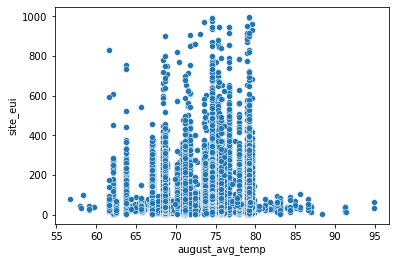

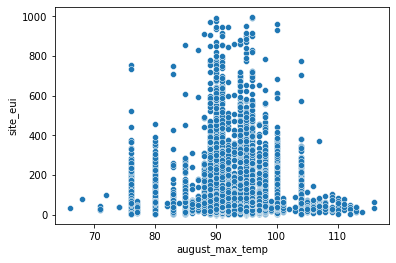

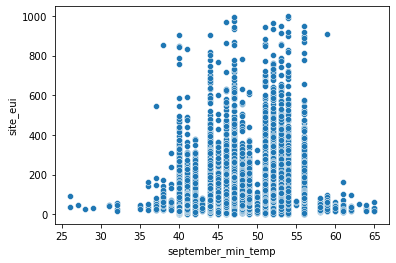

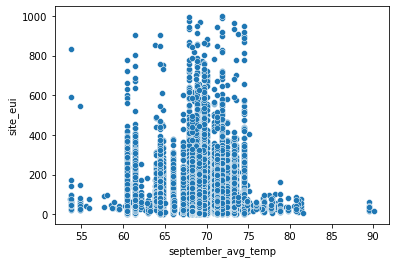

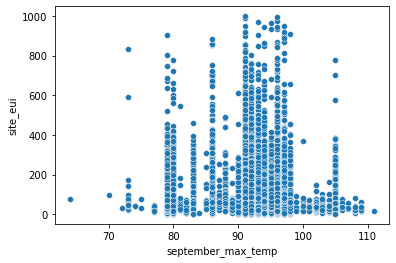

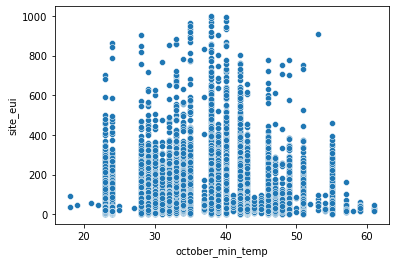

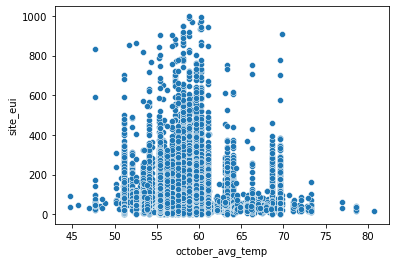

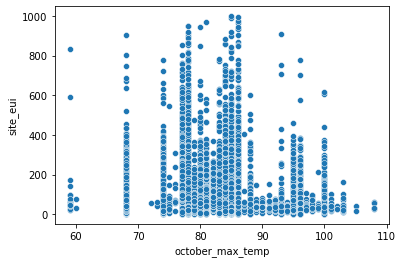

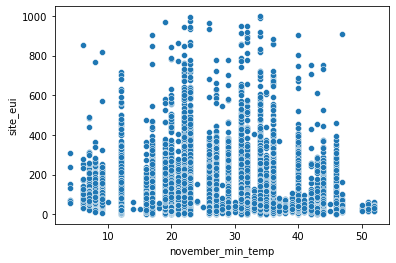

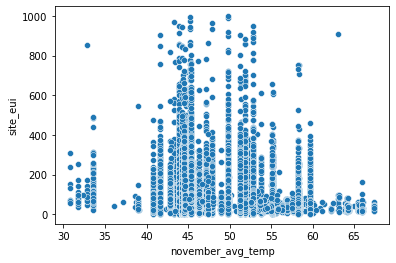

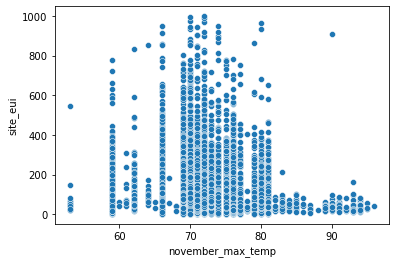

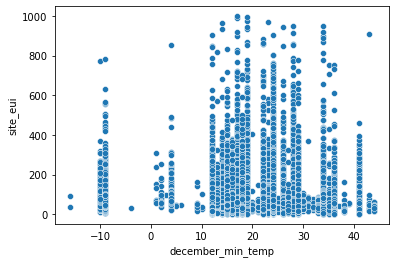

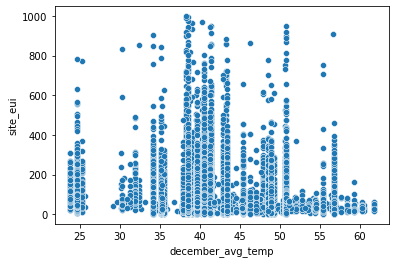

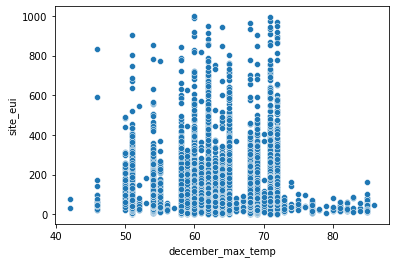

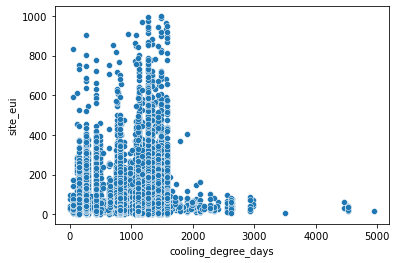

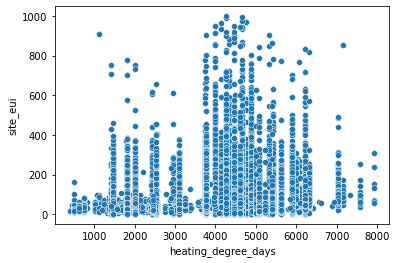

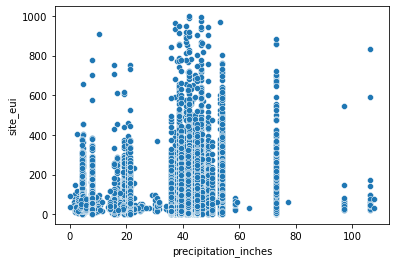

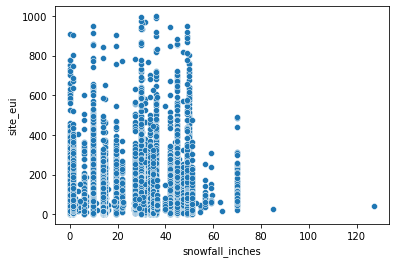

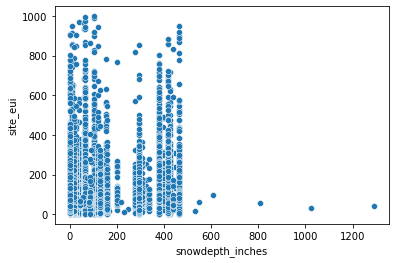

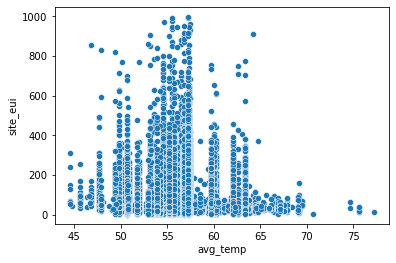

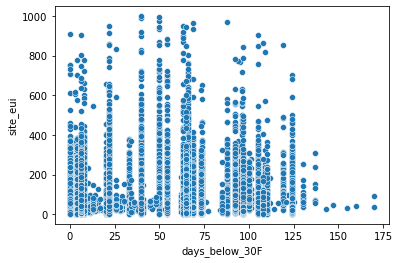

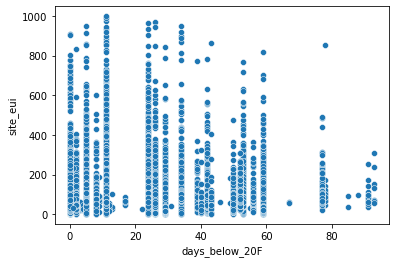

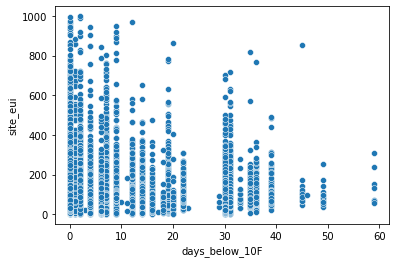

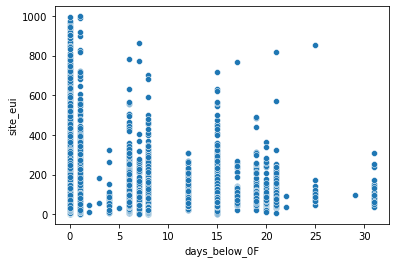

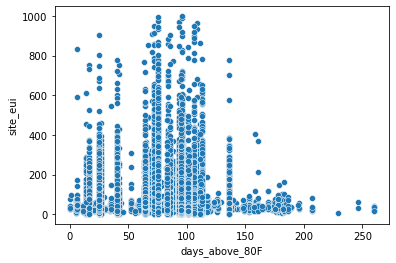

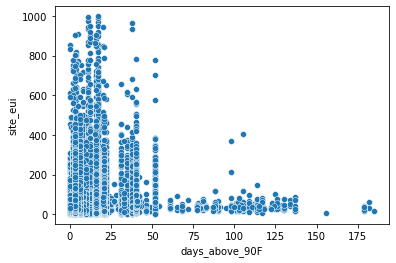

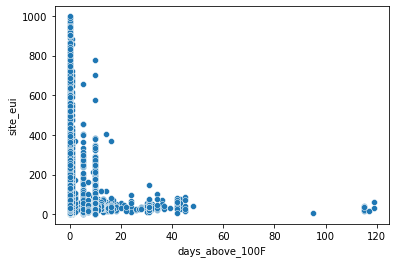

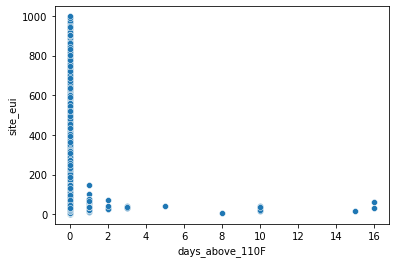

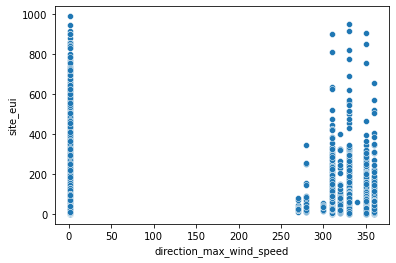

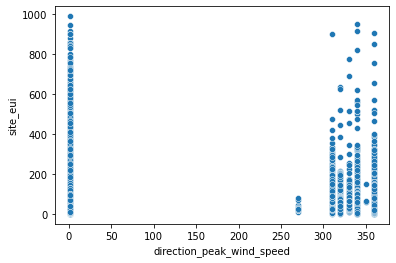

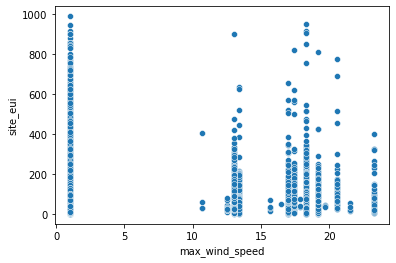

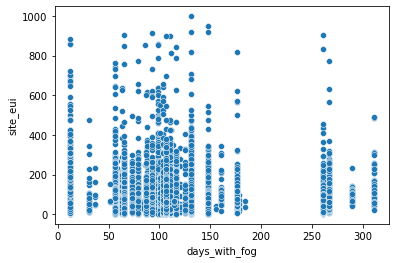

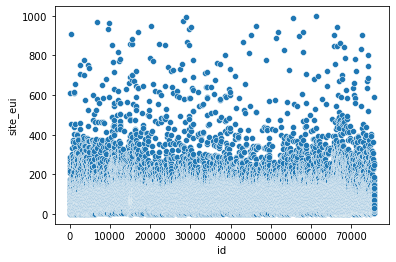

In [18]:
# plot each variable against site_eui
for col in input_df.columns:
    if col != "site_eui":
        sns.scatterplot(x=col,
                        y="site_eui",
                        data=input_df)
        plt.show()

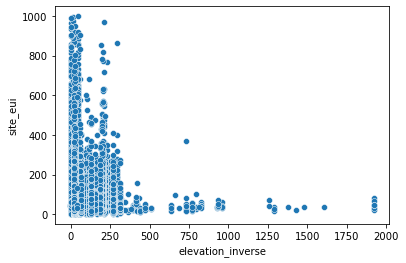

In [19]:
# 1/ elevation
input_df['elevation_inverse'] = input_df['ELEVATION']
sns.scatterplot(x="elevation_inverse",
                y="site_eui",
                data=input_df)
plt.show()

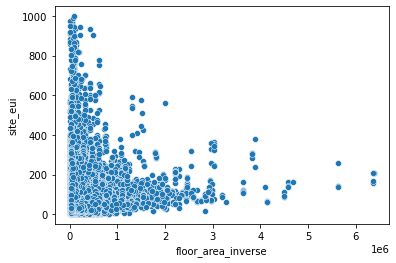

In [20]:
# 1/ floor area
input_df['floor_area_inverse'] = input_df['floor_area']
sns.scatterplot(x="floor_area_inverse",
                y="site_eui",
                data=input_df)
plt.show()

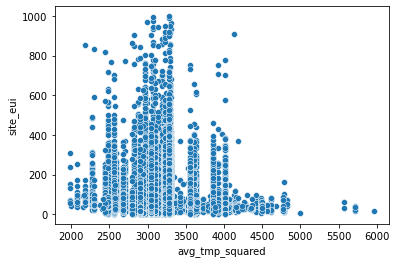

In [21]:
input_df['avg_tmp_squared'] = input_df['avg_temp']**2
sns.scatterplot(x="avg_tmp_squared",
                y="site_eui",
                data=input_df)
plt.show()

### Feature engineering - convert categorical into dummy variables

In [23]:
input_df.select_dtypes("object")

State_Factor building_class                              facility_type
0          State_1     Commercial               Grocery_store_or_food_market
1          State_1     Commercial  Warehouse_Distribution_or_Shipping_center
2          State_1     Commercial                       Retail_Enclosed_mall
3          State_1     Commercial                  Education_Other_classroom
4          State_1     Commercial                  Warehouse_Nonrefrigerated
...            ...            ...                                        ...
75752     State_11     Commercial                       Office_Uncategorized
75753     State_11    Residential                        5plus_Unit_Building
75754     State_11     Commercial                           Commercial_Other
75755     State_11     Commercial                           Commercial_Other
75756     State_11    Residential                         2to4_Unit_Building

[75757 rows x 3 columns]

In [24]:
# encode each category within each categorical variable as a separate variable. 
# remove the first category for each variable to avoid redundancy and multicolinearity 
input_df_w_dummies = pd.get_dummies(data = input_df, columns = input_df.select_dtypes("object").columns)
input_df_w_dummies = input_df_w_dummies.drop(columns = ['State_Factor_State_1', 'building_class_Commercial', 'facility_type_2to4_Unit_Building'], inplace = False, axis = 1)
input_df_w_dummies.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0            1     61242.0      1942.0                11.0        2.4   
1            1    274000.0      1955.0                45.0        1.8   
2            1    280025.0      1951.0                97.0        1.8   
3            1     55325.0      1980.0                46.0        1.8   
4            1     66000.0      1985.0               100.0        2.4   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0                36              50.5                68                 35   
1                36              50.5                68                 35   
2                36              50.5                68                 35   
3                36              50.5                68                 35   
4                36              50.5                68                 35   

   february_avg_temp  ...  facility_type_Retail_Uncategorized  \
0          50.589286  ...                                   0   
1          50.589286  ...                                   0   
2          50.589286  ...                                   0   
3          50.589286  ...                                   0   
4          50.589286  ...                                   0   

   facility_type_Retail_Vehicle_dealership_showroom  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   facility_type_Service_Drycleaning_or_Laundry  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   facility_type_Service_Uncategorized  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   facility_type_Service_Vehicle_service_repair_shop  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   facility_type_Warehouse_Distribution_or_Shipping_center  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  0         
4                                                  0         

   facility_type_Warehouse_Nonrefrigerated  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   

   facility_type_Warehouse_Refrigerated  facility_type_Warehouse_Selfstorage  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   facility_type_Warehouse_Uncategorized  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 130 columns]

In [63]:
def cat_to_num(input_df : pd.DataFrame) -> pd.DataFrame:
    ''' Returns categorical columns as dummies numerical ones
    '''
    orig_dum_cols = input_df.select_dtypes("object").columns
    input_df_w_dummies = pd.get_dummies(data = input_df, columns = orig_dum_cols)
    #input_df_w_dummies = input_df_w_dummies.drop(columns = orig_dum_cols, inplace = False, axis = 1)
    return(input_df_w_dummies)

### Outlier detection

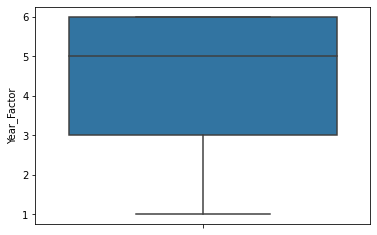

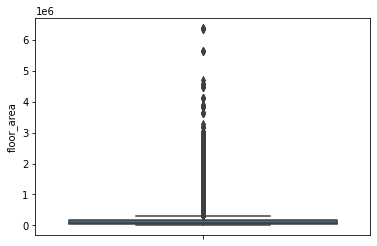

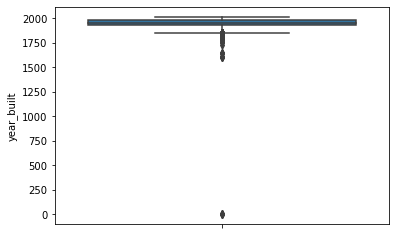

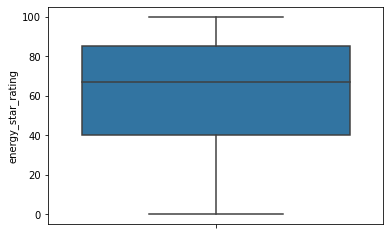

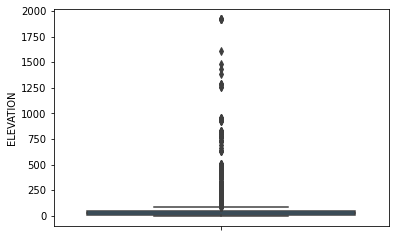

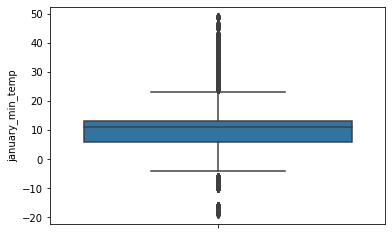

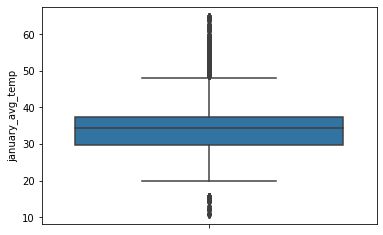

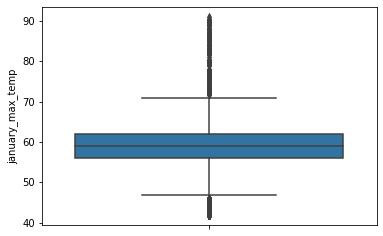

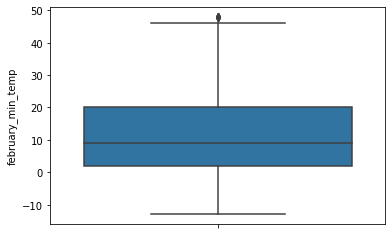

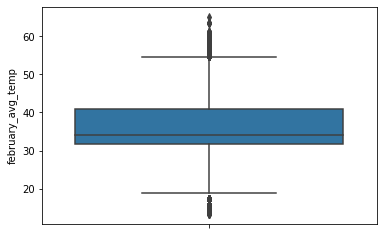

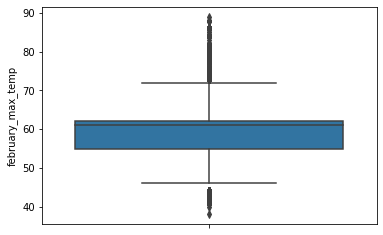

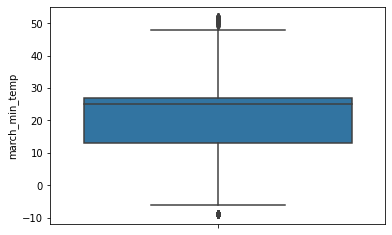

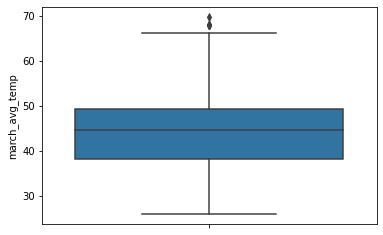

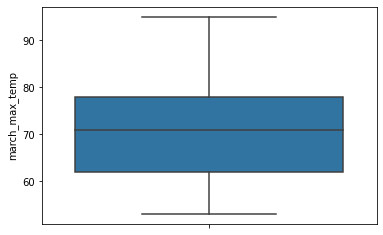

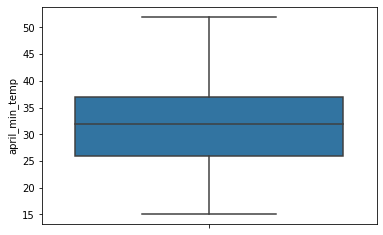

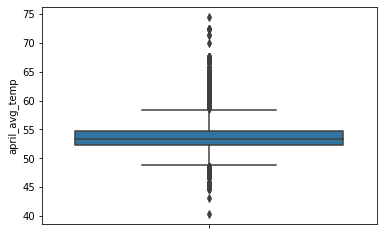

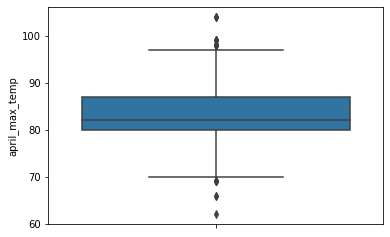

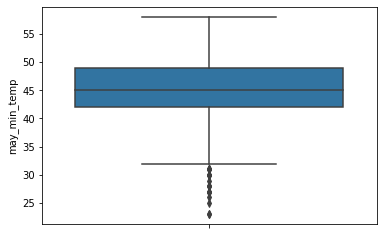

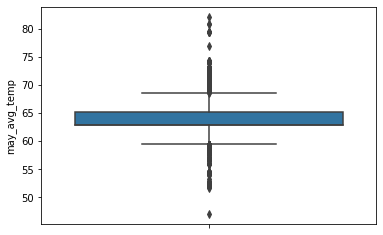

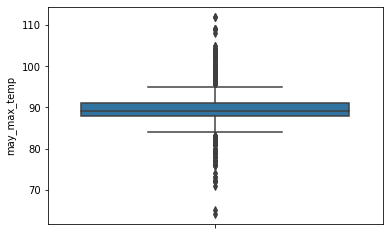

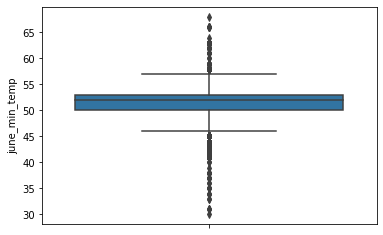

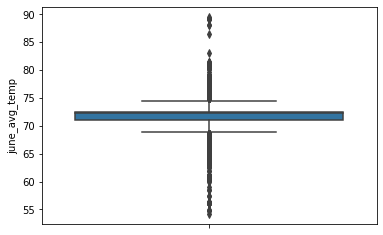

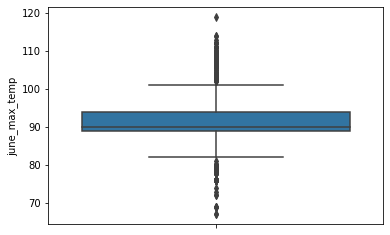

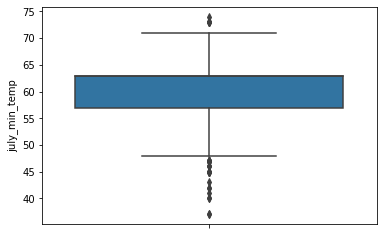

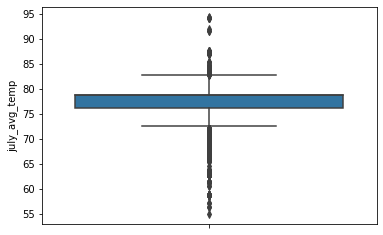

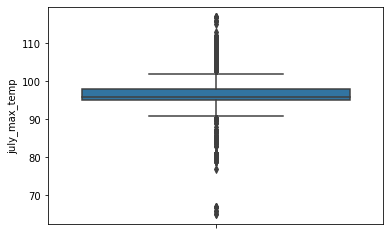

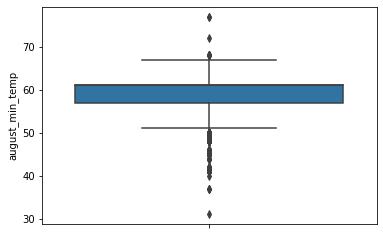

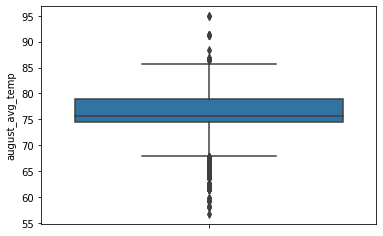

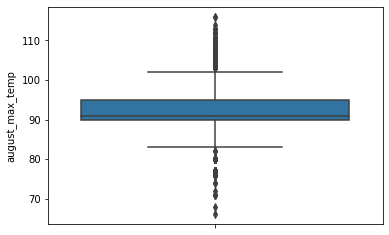

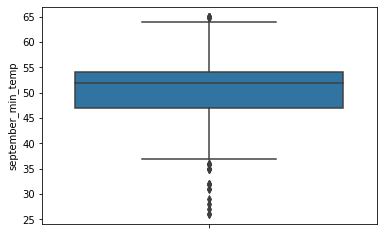

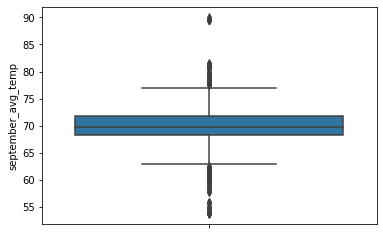

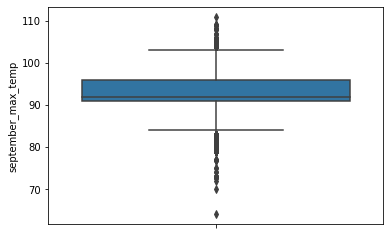

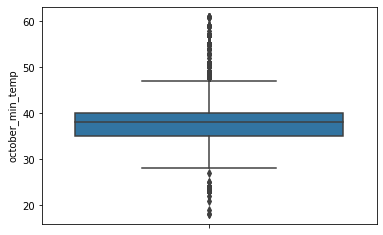

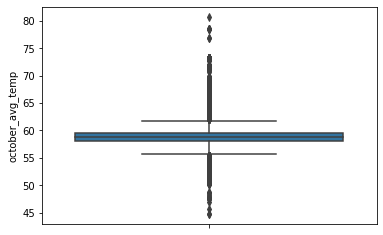

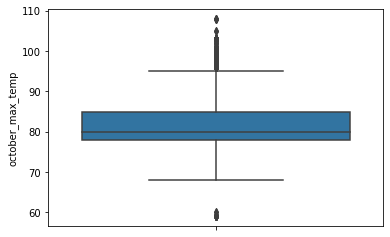

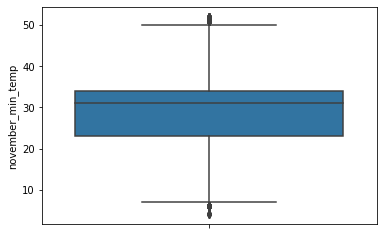

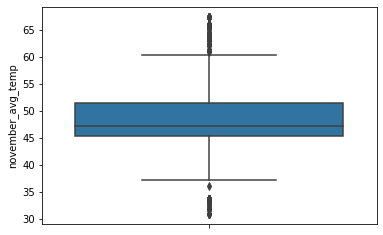

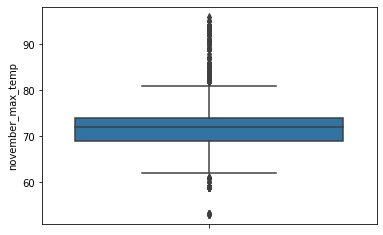

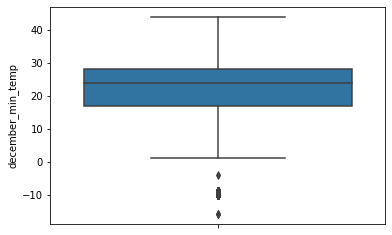

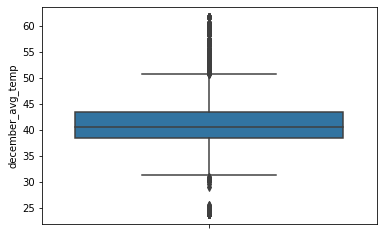

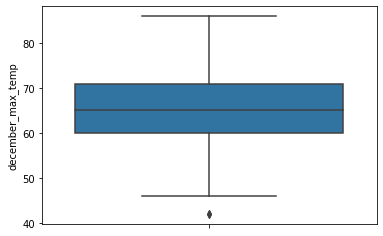

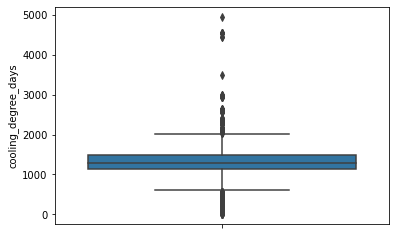

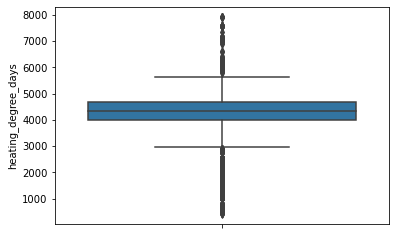

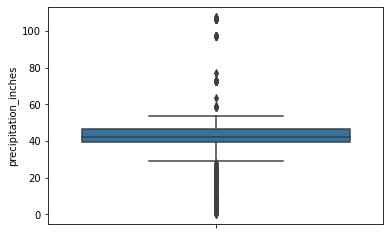

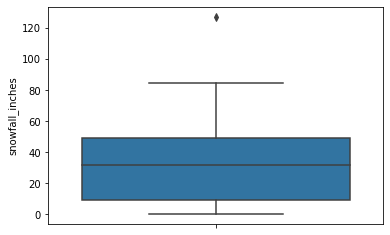

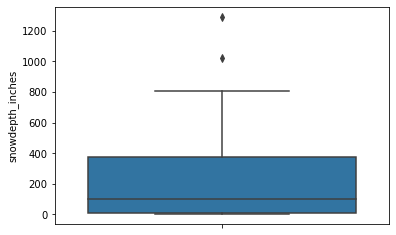

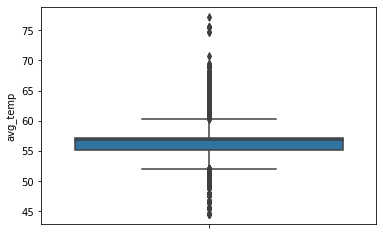

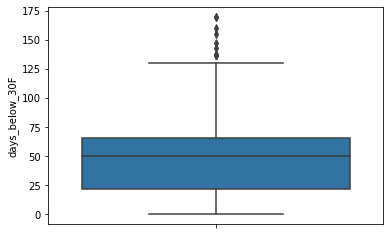

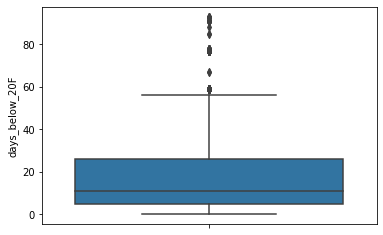

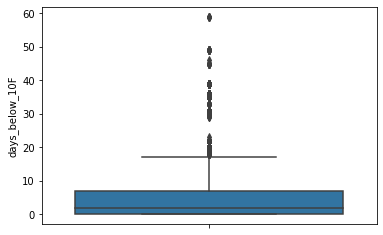

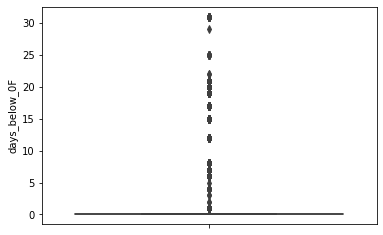

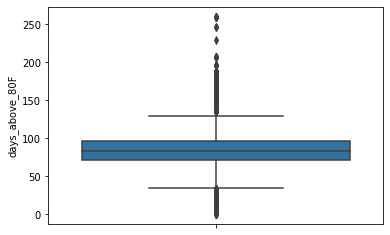

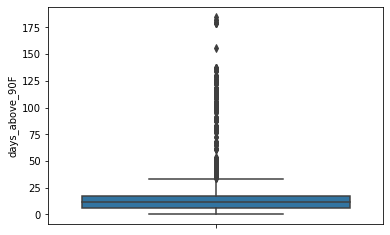

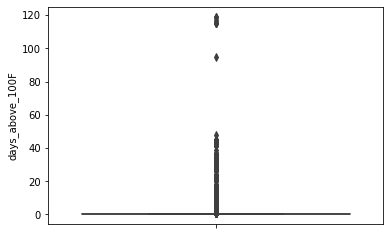

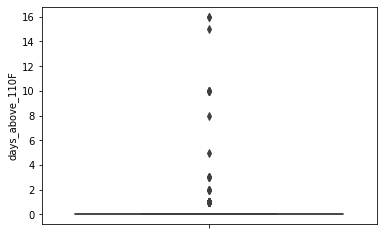

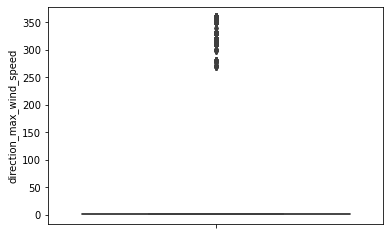

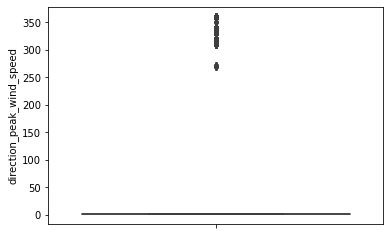

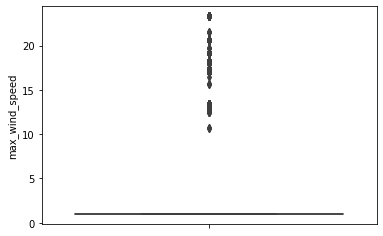

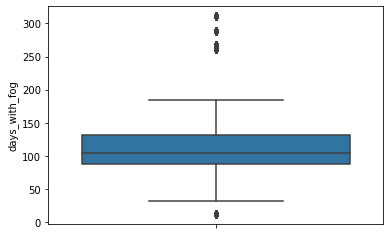

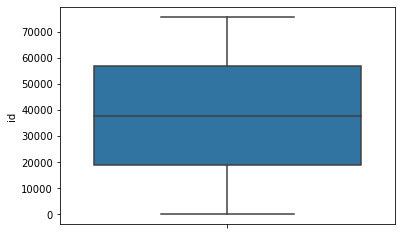

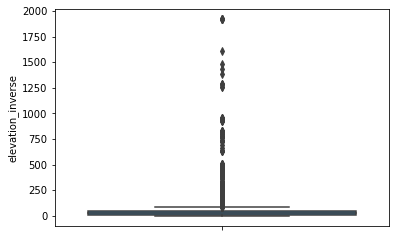

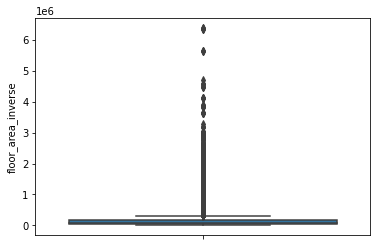

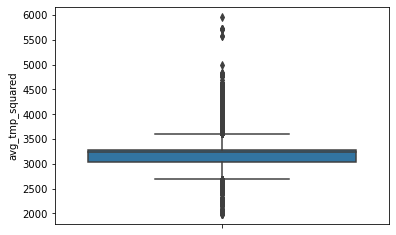

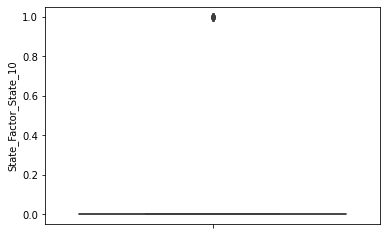

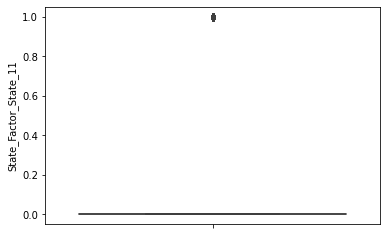

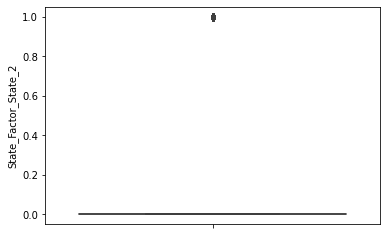

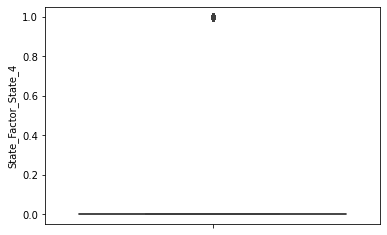

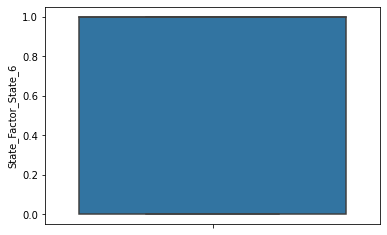

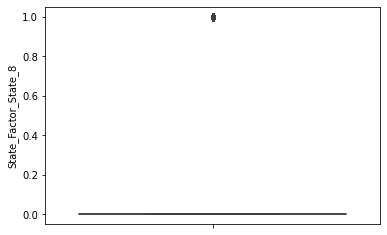

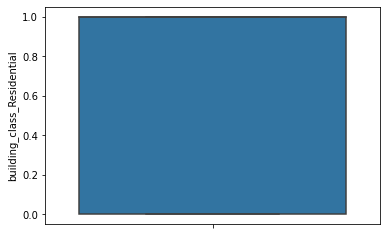

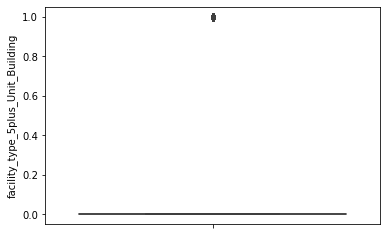

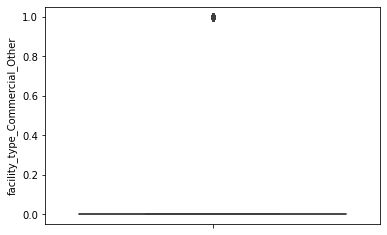

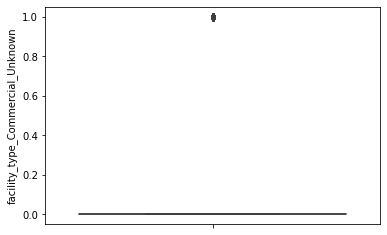

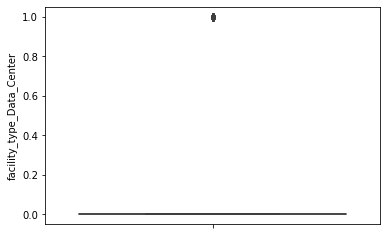

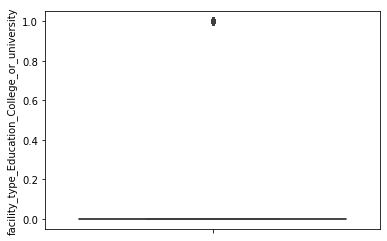

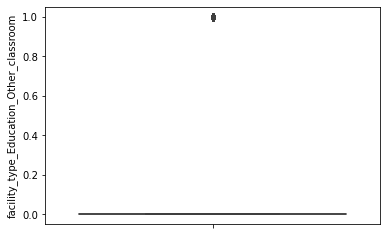

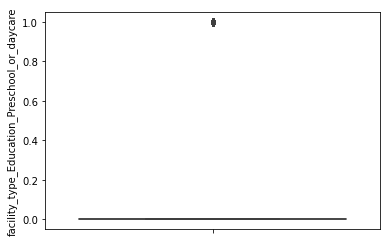

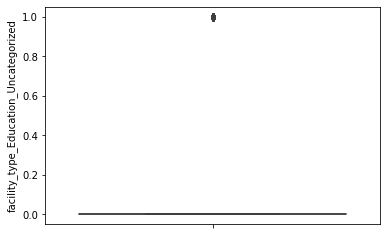

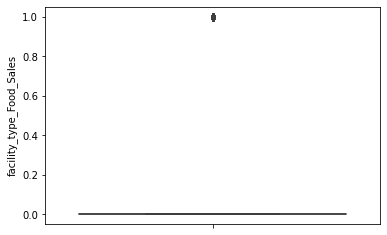

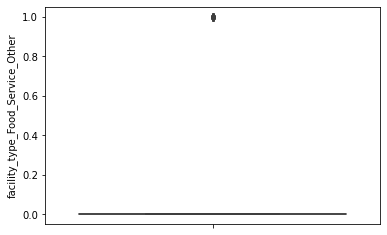

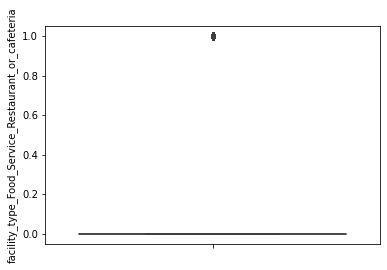

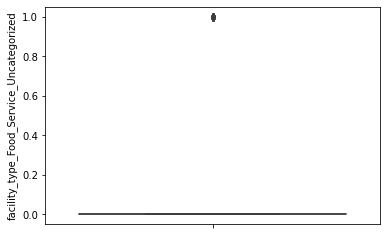

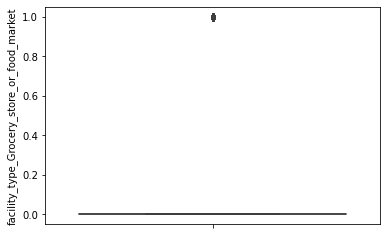

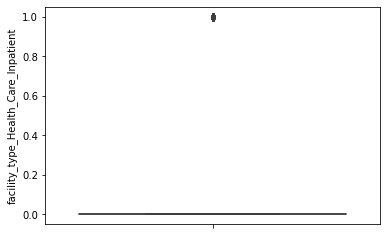

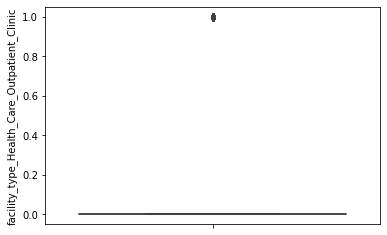

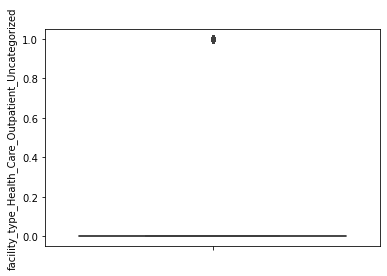

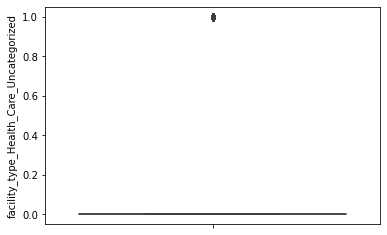

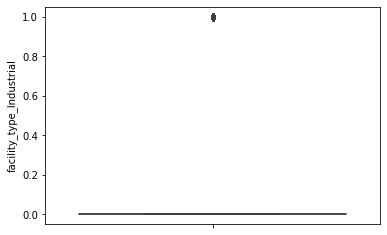

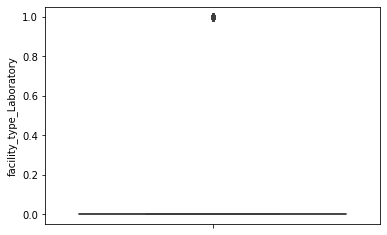

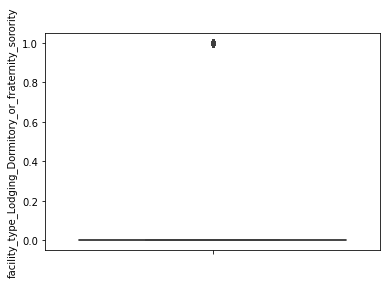

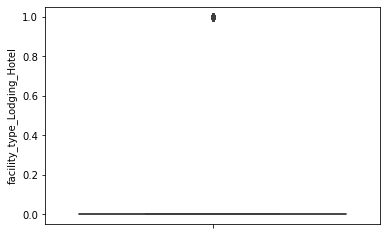

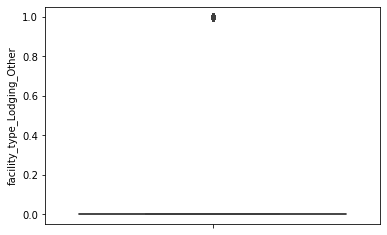

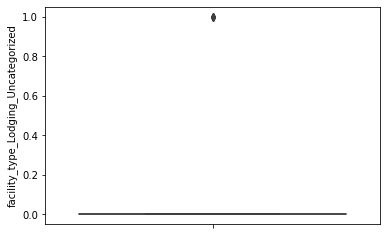

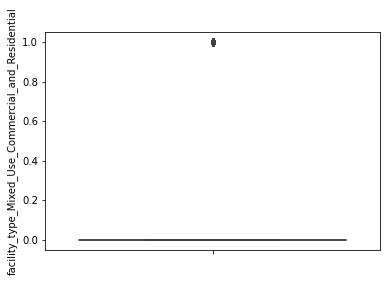

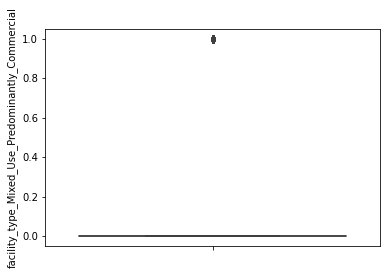

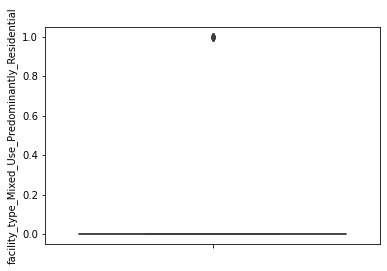

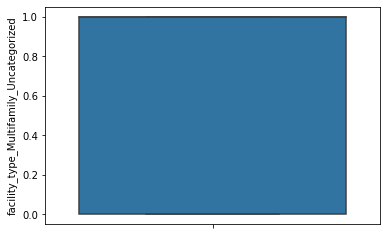

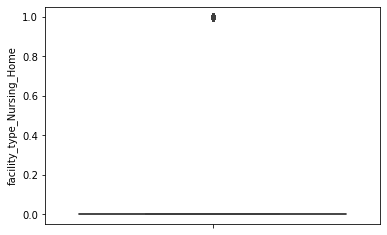

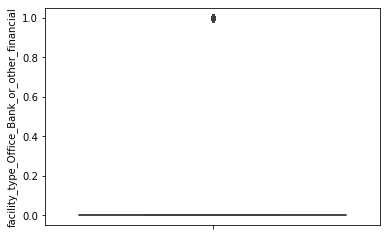

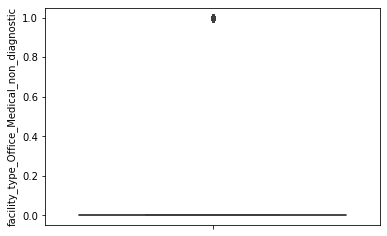

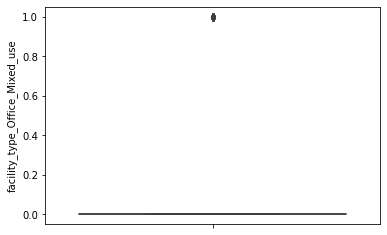

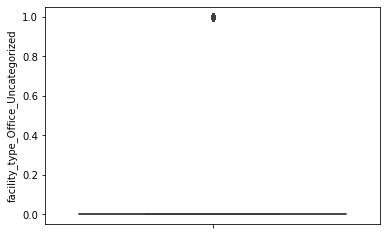

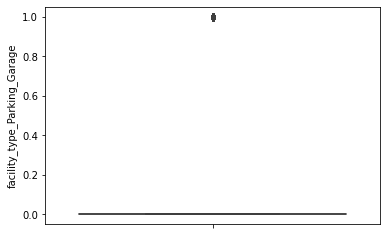

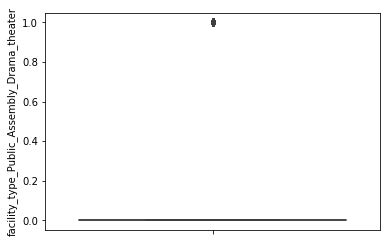

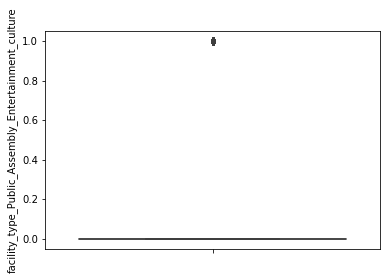

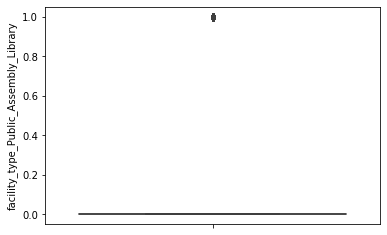

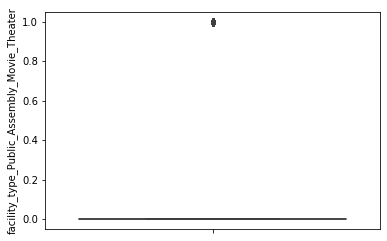

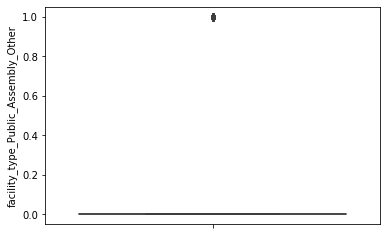

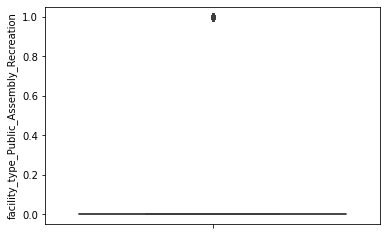

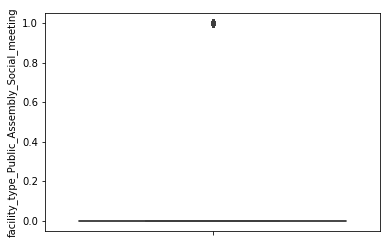

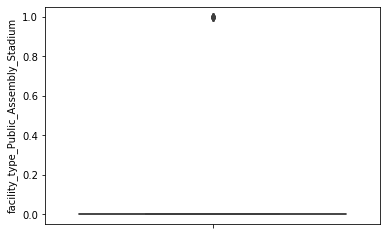

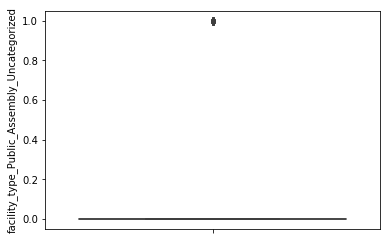

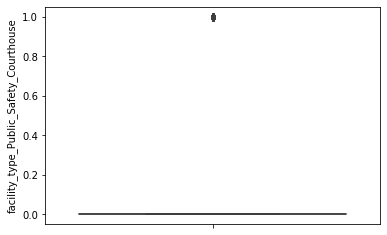

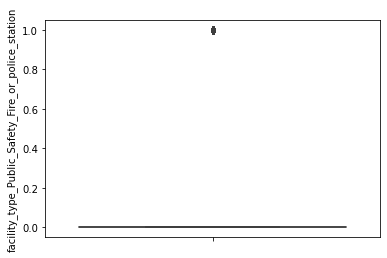

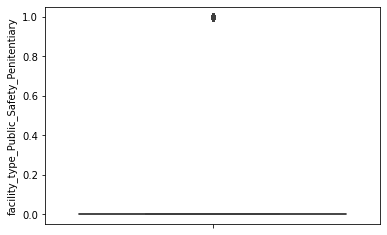

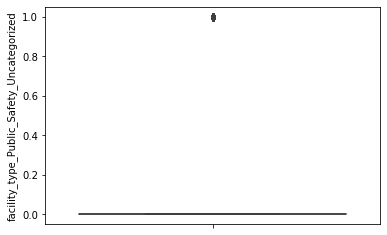

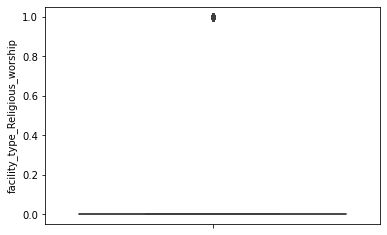

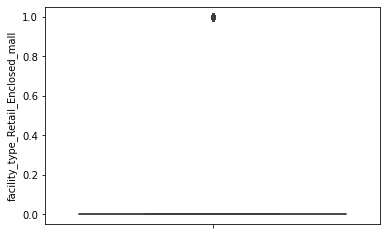

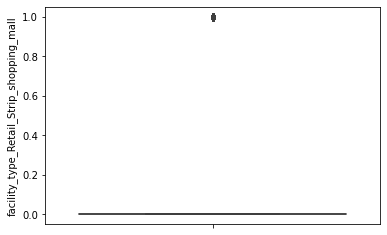

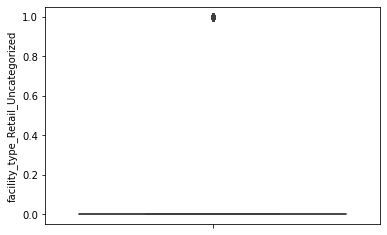

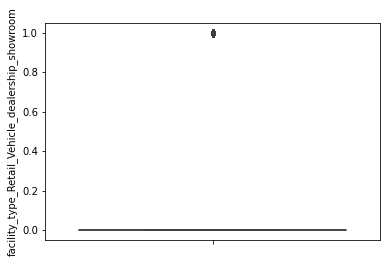

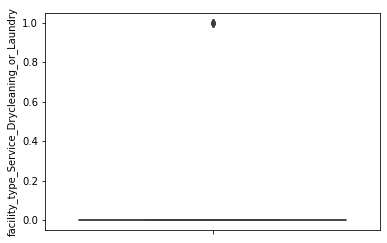

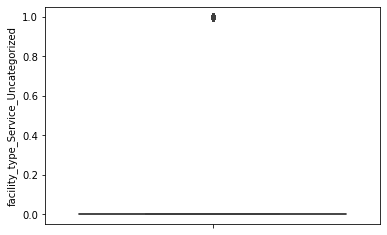

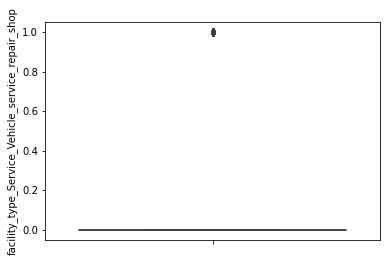

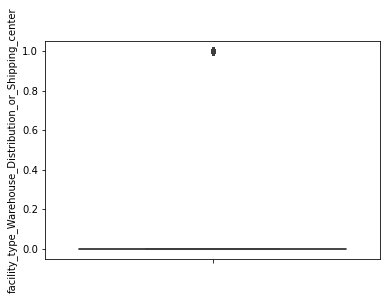

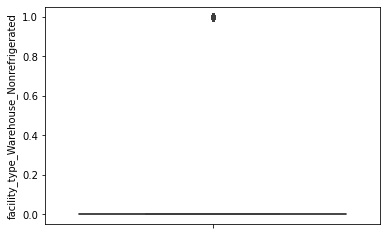

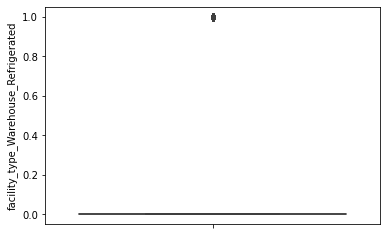

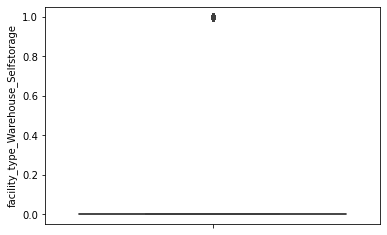

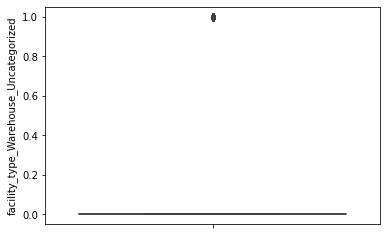

In [25]:
for col in input_df_w_dummies.columns:
    if col != "site_eui":
        sns.boxplot(y=col,data=input_df_w_dummies)
        plt.show()

### Impute missing values

In [26]:
# Predicted Value Imputation (PVI)
# year_built                    

# energy_star_rating
replace_val = input_df_w_dummies['year_built'].mode().values[0]
print(replace_val)
input_df_w_dummies.loc[input_df_w_dummies['year_built'].isna(), 'year_built'] = replace_val

1927.0


In [27]:
input_df_w_dummies.loc[input_df_w_dummies['year_built'].isna()]

Empty DataFrame
Columns: [Year_Factor, floor_area, year_built, energy_star_rating, ELEVATION, january_min_temp, january_avg_temp, january_max_temp, february_min_temp, february_avg_temp, february_max_temp, march_min_temp, march_avg_temp, march_max_temp, april_min_temp, april_avg_temp, april_max_temp, may_min_temp, may_avg_temp, may_max_temp, june_min_temp, june_avg_temp, june_max_temp, july_min_temp, july_avg_temp, july_max_temp, august_min_temp, august_avg_temp, august_max_temp, september_min_temp, september_avg_temp, september_max_temp, october_min_temp, october_avg_temp, october_max_temp, november_min_temp, november_avg_temp, november_max_temp, december_min_temp, december_avg_temp, december_max_temp, cooling_degree_days, heating_degree_days, precipitation_inches, snowfall_inches, snowdepth_inches, avg_temp, days_below_30F, days_below_20F, days_below_10F, days_below_0F, days_above_80F, days_above_90F, days_above_100F, days_above_110F, direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog, site_eui, id, elevation_inverse, floor_area_inverse, avg_tmp_squared, State_Factor_State_10, State_Factor_State_11, State_Factor_State_2, State_Factor_State_4, State_Factor_State_6, State_Factor_State_8, building_class_Residential, facility_type_5plus_Unit_Building, facility_type_Commercial_Other, facility_type_Commercial_Unknown, facility_type_Data_Center, facility_type_Education_College_or_university, facility_type_Education_Other_classroom, facility_type_Education_Preschool_or_daycare, facility_type_Education_Uncategorized, facility_type_Food_Sales, facility_type_Food_Service_Other, facility_type_Food_Service_Restaurant_or_cafeteria, facility_type_Food_Service_Uncategorized, facility_type_Grocery_store_or_food_market, facility_type_Health_Care_Inpatient, facility_type_Health_Care_Outpatient_Clinic, facility_type_Health_Care_Outpatient_Uncategorized, facility_type_Health_Care_Uncategorized, facility_type_Industrial, facility_type_Laboratory, facility_type_Lodging_Dormitory_or_fraternity_sorority, facility_type_Lodging_Hotel, facility_type_Lodging_Other, facility_type_Lodging_Uncategorized, facility_type_Mixed_Use_Commercial_and_Residential, facility_type_Mixed_Use_Predominantly_Commercial, facility_type_Mixed_Use_Predominantly_Residential, facility_type_Multifamily_Uncategorized, facility_type_Nursing_Home, facility_type_Office_Bank_or_other_financial, ...]
Index: []

[0 rows x 130 columns]

In [28]:
input_df_w_dummies.apply(lambda col: col.isna().sum()*100/len(input_df_w_dummies))

Year_Factor                                                 0.000000
floor_area                                                  0.000000
year_built                                                  0.000000
energy_star_rating                                         35.256148
ELEVATION                                                   0.000000
                                                             ...    
facility_type_Warehouse_Distribution_or_Shipping_center     0.000000
facility_type_Warehouse_Nonrefrigerated                     0.000000
facility_type_Warehouse_Refrigerated                        0.000000
facility_type_Warehouse_Selfstorage                         0.000000
facility_type_Warehouse_Uncategorized                       0.000000
Length: 130, dtype: float64

In [29]:
input_df_w_dummies['energy_star_rating'] = input_df_w_dummies['energy_star_rating'].interpolate()

array([[<AxesSubplot:title={'center':'energy_star_rating'}>,
        <AxesSubplot:title={'center':'year_built'}>]], dtype=object)

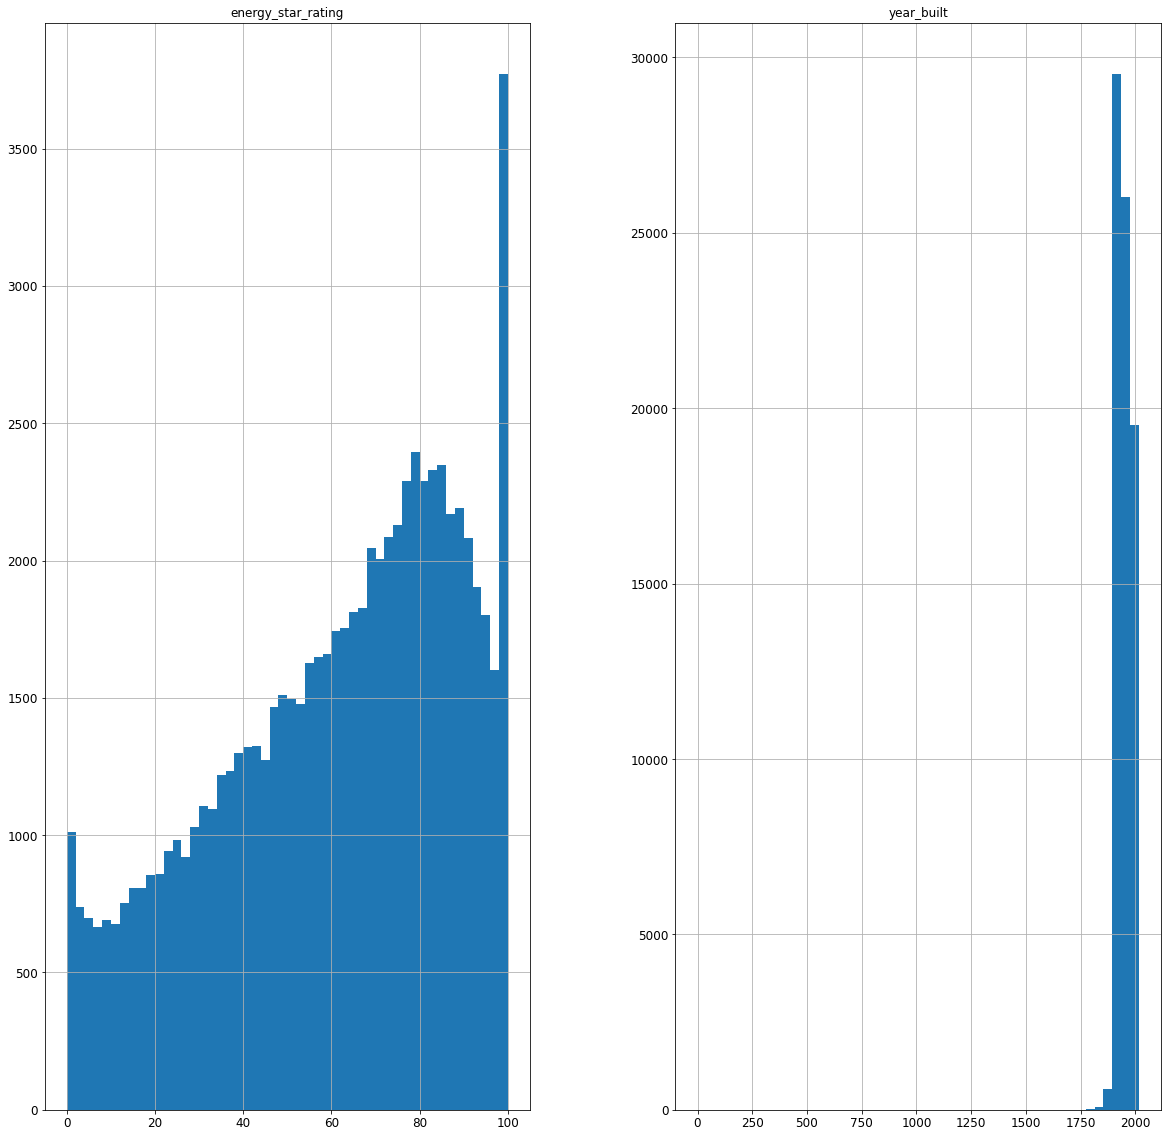

In [30]:
input_df_w_dummies[['energy_star_rating', 'year_built']].hist(figsize=(20, 20), bins=50, xlabelsize=12, ylabelsize=12)

In [59]:
def impute_missing(input_df : pd.DataFrame) -> pd.DataFrame:
    '''
    '''
    replace_val = input_df['year_built'].mode().values[0]
    input_df.loc[input_df['year_built'].isna(), 'year_built'] = replace_val
    input_df['energy_star_rating'] = input_df['energy_star_rating'].interpolate()
    return(input_df)

In [44]:
# split our data into 80% training_validation, 20% test for now
features = ['energy_star_rating', 'year_built', 'ELEVATION', 'avg_temp', 'floor_area', 'building_class_Residential']
test_size = 0.2
train_and_validate_data, test_data = \
    train_test_split(input_df_w_dummies[features + ['id', 'site_eui']], test_size=test_size, random_state=6)

In [50]:
# split our data into 80% training, 20% validation for now
validate_size = 0.2
train_data, validation_data = \
    train_test_split(input_df_w_dummies[features + ['id', 'site_eui']], test_size=validate_size, random_state=6)

What is EUI? 
Essentially, EUI expresses a building’s energy use as a function of its size or other characteristics.For property types in Portfolio Manager, EUI is expressed as energy per square foot per year. It’s calculated by dividing the total energy consumed by the building in one year (measured in kBtu or GJ) by the total gross floor area of the building (measured in square feet or square meters). 

What can affect EUI?
- Property types
- Proporty size
- Occupant Density
- Transportation

In [65]:
test_data = cat_to_num(input_df = test_data)
test_data = impute_missing(input_df = test_data)

   Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  ...  days_below_0F  days_above_80F  days_above_90F  \

In [70]:
# get proportion of NAs and pull only variables with NAs
prop_nas = test_data.apply(lambda col: col.isna().sum()*100/len(test_data))
prop_nas[prop_nas > 0]
test_data= test_data.drop(columns = ['direction_max_wind_speed', "direction_peak_wind_speed", 
                                     "max_wind_speed", "days_with_fog"])


In [78]:
test_data = test_data[list(set(list(train_data.columns)) - set(['site_eui']))]

In [54]:
# k nearest neighbor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

def fit_and_predict_regressor(model, params_dict, X_train, y_train, X_test):
    '''
    '''
    
    # grid search on parameters
    search = GridSearchCV(estimator = model(),
                          param_grid=params_dict,
                          return_train_score=True,
                          cv = 6).fit(X = X_train.to_numpy(), 
                                      y = y_train.to_numpy())
    params_best = search.best_params_
    print("Done finding best params:\n{}".format(params_best))
    model = model(**params_best).fit(X_train.to_numpy(), y_train.to_numpy())
    print("Done fitting model!")
    y_test = model.predict(X_test.to_numpy())
    return(y_test)
    

In [36]:
train_data

energy_star_rating  year_built  ELEVATION   avg_temp  floor_area  \
34329           62.000000      1931.0        3.4  54.501370     91760.0   
52280           63.000000      1929.0       25.6  56.835616     83785.0   
70343           22.000000      1923.0       18.3  55.693151    542305.0   
9971            80.000000      1942.0        3.0  57.443182    533545.0   
23492           50.666667      1958.0        3.4  57.366120    135028.0   
...                   ...         ...        ...        ...         ...   
25012           36.041096      1951.0       11.9  55.449315    107000.0   
12881           96.000000      2007.0      205.7  53.562674    198033.0   
35398           51.000000      1932.0       42.7  54.501370    192500.0   
46121           69.000000      1964.0       42.7  56.835616    165435.0   
52962           87.500000      1959.0        3.4  57.215847     86860.0   

       building_class_Residential     id    site_eui  
34329                           1  34329   74.396305  
52280                           1  52280   90.194953  
70343                           0  70343  118.984228  
9971                            0   9971   90.313786  
23492                           1  23492   37.586642  
...                           ...    ...         ...  
25012                           0  25012   65.108138  
12881                           1  12881   47.693536  
35398                           0  35398   96.841493  
46121                           1  46121   85.863291  
52962                           1  52962   69.509563  

[48484 rows x 8 columns]

In [66]:
random_test = fit_and_predict_regressor(model = KNeighborsRegressor, 
                                        params_dict = {'n_neighbors':list(range(1,11)),
                                                       'weights':['uniform', 'distance']}, 
                                        X_train = train_data.drop(columns = ["site_eui", "id"]),
                                        y_train = train_data["site_eui"], 
                                        X_test = validation_data.drop(columns = ["site_eui", "id"]))

KeyboardInterrupt: 

In [38]:
from sklearn.metrics import mean_squared_error as mse
import math
math.sqrt(mse(y_true = validation_data['site_eui'].to_numpy(), y_pred = random_test))

49.491635385521846

In [79]:
y_test = fit_and_predict_regressor(model = KNeighborsRegressor, 
                                    params_dict = {'n_neighbors':list(range(1,11)),
                                                   'weights':['uniform', 'distance']}, 
                                    X_train = train_data.drop(columns = ["site_eui", "id"]),
                                    y_train = train_data["site_eui"], 
                                    X_test = test_data.drop(columns = ["id"]))

Done finding best params:
{'n_neighbors': 9, 'weights': 'distance'}
Done fitting model!


In [80]:
test_data['site_eui'] = y_test

/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
test_data[['id', 'site_eui']].to_csv("/Users/rexxx/widsdatathon2022_test.csv", index = False)

In [51]:
test_data = pd.read_csv("/Users/rexxx/widsdatathon2022/a_data_intake/_input_data/test.csv")

In [39]:
validation_data['site_eui'].max()

975.4523213

/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


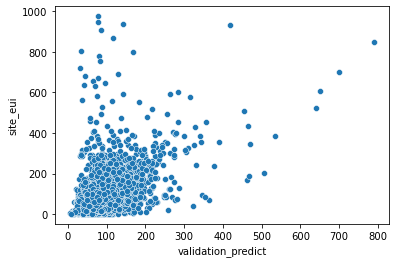

In [40]:
validation_data["validation_predict"] = random_test
sns.scatterplot(x="validation_predict",
                y="site_eui",
                data=validation_data)
plt.show()

In [83]:
ada_test = fit_and_predict_regressor(model = AdaBoostRegressor, 
                                        params_dict = {'n_estimators':[50, 80, 100],
                                                       'learning_rate':[0.01, 0.05],
                                                       'loss':["linear", "square", "exponential"]}, 
                                        X_train = train_data.drop(columns = ["site_eui", "id"]),
                                        y_train = train_data["site_eui"], 
                                        X_test = validation_data.drop(columns = ["site_eui", "id"]))

KeyboardInterrupt: 

In [ ]:
math.sqrt(mse(y_true = validation_data['site_eui'].to_numpy(), y_pred = ada_test))

In [ ]:
validation_data["validation_predict"] = ada_test
sns.scatterplot(x="validation_predict",
                y="site_eui",
                data=validation_data)
plt.show()

In [42]:
random_test = fit_and_predict_regressor(model = RandomForestRegressor, 
                                        params_dict = {'max_depth': [7], 
                                                       'max_features': [7], 
                                                       'n_estimators': [300]},
                                                        #{'max_depth': [3,4,5,6],
                                                       #'max_features': ['auto', 'sqrt'],
                                                       #'min_samples_leaf': [1, 2, 4],
                                                       #'min_samples_split': [2, 5, 10],
                                                       #'n_estimators': [200,300,400]}, 
                                        X_train = train_data.drop(columns = ["site_eui", "id"]),
                                        y_train = train_data["site_eui"], 
                                        X_test = validation_data.drop(columns = ["site_eui", "id"]), 
                                        y_test = validation_data["site_eui"])

/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site

/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/rexxx/anaconda3/envs/rxu17_env/lib/python3.7/site

ValueError: max_features must be in (0, n_features]